## <font color=darkolivegreen> Аналитика в интернет-магазине </font> 

## <font color=olive>1 шаг. Приоритизация гипотез</font>

## <font color=olive>Описание данных</font>

#### <font color=olivedrab>Таблица Hypothesis - сформулированные гипотезы и их оценка:</font>

 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 

! Чем больше значение Efforts, тем дороже проверка гипотезы.

In [4]:
# импортируем данные
import pandas as pd
from datetime import datetime, time
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
# и сохраним исходную таблицу в переменной:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [6]:
# посмотрим информацию о таблице
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В таблице содержится информация о 9 гипотезах с оценками:
 - охвата пользователей, на которых может повлиять гипотеза (Reach);
 - влияния на пользователей (Impact);
 - уверенности в гипотезе (Confidence);
 - затрат ресурсов на проверку гипотезы (Efforts).

Все колонки заполнены, можно приступать к приоритизации.

In [7]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [8]:
# применим фреймфорк ICE для приоритизации:
# посчитаем ICE для каждой из гипотез:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
# посмотрим на результаты
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Наиболее перспективные гипотезы согласно фреймфорку ICE - 9, 1 и 8.

In [9]:
# применим фреймфорк RICE для приоритизации:
# посчитаем RICE для каждой из гипотез:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
# посмотрим на результаты
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


In [10]:
hypothesis['Hypothesis'].value_counts()

Запустить акцию, дающую скидку на товар в день рождения                                                         1
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей        

Наиболее перспективные гипотезы согласно фреймворку RICE - 8, 3 и 1.

Изменение приоритетов гипотез объясняется тем, что оценка параметр Reach восьмой гипотезы составляет 10 баллов, то есть именно эта гипотеза повлияет на бОльшее количество пользователей, чем все остальные. 

Для проведения A/B-теста используем гипотезу о добавлении формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

После проведения A/B-теста получилен результаты, которые описаны в таблицах.

#### <font color=olivedrab>Таблица Orders - информация о заказах:</font>

 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.
 
#### <font color=olivedrab>Таблица Visitors - информация о количестве пользователей за указанную дату:</font> 

 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

In [12]:
# сохраним исходные таблицы в переменных
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [14]:
for data in [orders, visitors]:
    print (data.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None



В таблице orders содержится информация о 1 197 заказах за срок проведения теста (август 2019 года), пользователях, совершивших заказ, датах заказов, выручке заказа и группе, в которую попал заказ. Столбец date в неверном формате.

В таблице visitors содержится информация о количестве пользователей в указанную дату в указанной группе A/B-теста. Столбец date в неверном формате.

## <font color=olive>2 шаг. Предобработка данных</font>

In [10]:
# заменим тип данных столбца date в обоих таблицах на дату:
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [11]:
visitors['date'].describe()

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [12]:
orders['date'].describe()

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

Собранные данные не выходят за границы дат проведения теста.

In [13]:
# проверим наличие дубликатов
for data in [visitors, orders]: 
    print(data.duplicated().sum(), end='\n\n')

0

0



Дубликатов нет, данные подготовлены для анализа проведения A/B-теста.

## <font color=olive>3 шаг. Анализ A/B-теста</font>

Построим графики кумулятивных метрик. Для их построения нужно собрать кумулятивные данные.

In [14]:
# создаем массив уникальных пар значений дат и групп теста:
datesGroups = orders[['date','group']].drop_duplicates()
# собираем агрегированные кумулятивные по дням данные о заказах в несколько действий
ordersAggregated = (datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                      orders['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique,
                                             'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)
                                       .sort_values(by=['date','group']))
# собираем агрегированные кумулятивные по дням данные о посетителях интернет-магазина:
visitorsAggregated = (datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                          visitors['group'] == x['group'])]
                                        .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                                        .sort_values(by=['date','group']))
# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


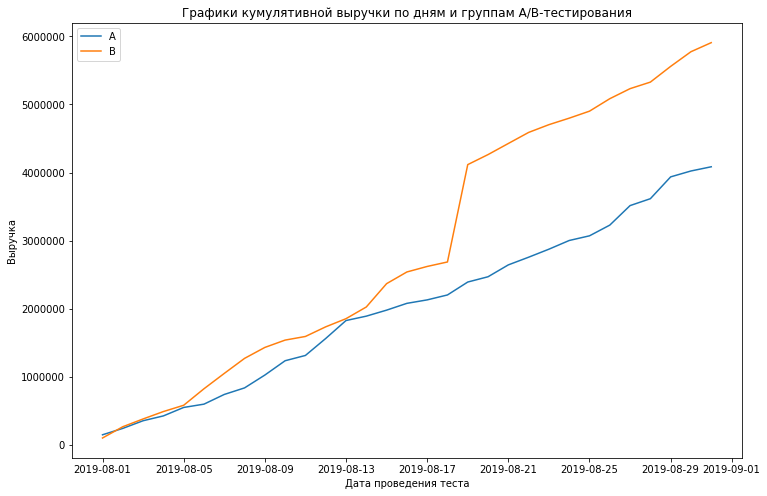

In [15]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# cтроим график выручки группы А
plt.figure(figsize=(12, 8))
plt.title("Графики кумулятивной выручки по дням и группам А/В-тестирования")
plt.xlabel("Дата проведения теста")
plt.ylabel("Выручка")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# cтроим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.show()

Выручка группы B с первых дней выше выручки группы А. 13 августа 2019 года есть небольшой скачок выручки группы А, тем самым в этот день она "догоняет" выручку группы В, но затем примерно 20 августа выручка группы В делает скачок, после чего обе выручки почти равномерно увеличиваются. Скачки выручки обеих групп говорят о резком увеличении количества заказов в день скачка или же о появлении крупных заказов.

Построим графики среднего чека по группам, для этого разделим кумулятивную выручку на кумулятивное число заказов

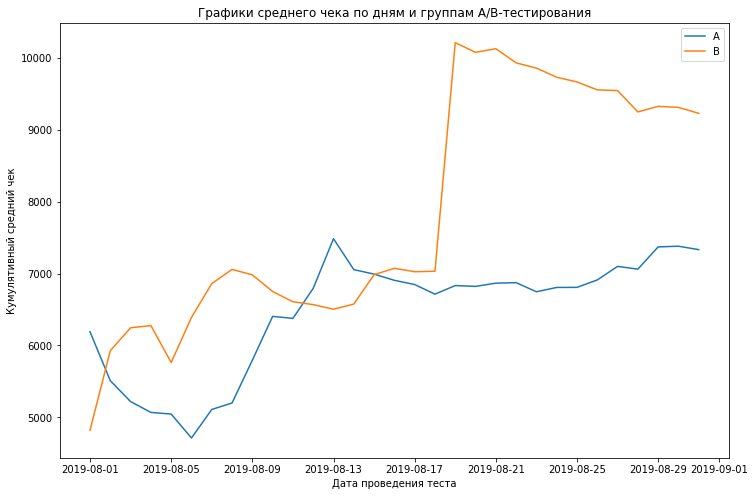

In [16]:
# график кумулятивного среднего чека по группе А:
plt.figure(figsize=(12, 8))
plt.title("Графики среднего чека по дням и группам А/В-тестирования")
plt.xlabel("Дата проведения теста")
plt.ylabel("Кумулятивный средний чек")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# график кумулятивного среднего чека по группе В:
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.show()

Вначале теста кумулятивное значение среднего чека сильно колеблется, у обоих групп есть скачки, которые влияют на дальнейшее поведение графика. Средний чек cтановится равномерным ближе к концу теста: понемногу растет для группы A и продолжает падать для группы B. Возможно, в группу B (резкий всплеск на графике) попали крупные заказы. Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

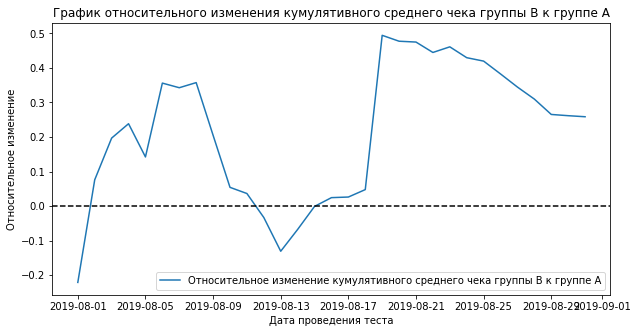

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date',
                                                    how='left', suffixes=['A', 'B']))

# cтроим отношение средних чеков
plt.figure(figsize=(10, 5))
plt.title("График относительного изменения кумулятивного среднего чека группы В к группе А")
plt.xlabel("Дата проведения теста")
plt.ylabel("Относительное изменение")
(plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
          (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,
          label="Относительное изменение кумулятивного среднего чека группы B к группе A"))
plt.legend()

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

По графику относительного изменения кумулятивного среднего чека группы В к группе А видно, что результаты теста резко менялись в несколько дат. Скорее всего в эти даты были совершены аномально крупные заказы.

Построим график кумулятивной конверсии по группам.

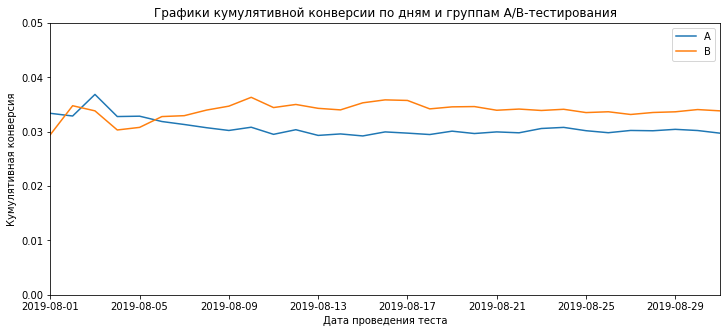

In [18]:
# посчитаем кумулятивную конверсию:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# данные по группе A:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# данные по группе B:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# график кумулятивной конверсии группы А:
plt.figure(figsize=(12, 5))
plt.title("Графики кумулятивной конверсии по дням и группам А/В-тестирования")
plt.xlabel("Дата проведения теста")
plt.ylabel("Кумулятивная конверсия")
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')

# график кумулятивной конверсии группы В:
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.00, 0.05])
plt.show()

В самом начале теста конверсия группы А была больше, но начиная с 5 августа конверсия группы В поднялась и продолжала превышать конверсию группы А до конца теста.

Постром график относительного изменения кумулятивной конверсии группы B к группе A.

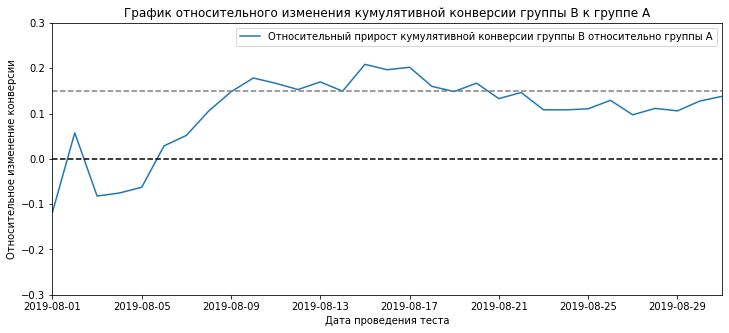

In [19]:
# объединим таблицы cumulativeDataA и cumulativeDataB
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# построим график относительного изменения кумулятивной конверсии группы B к группе A:
plt.figure(figsize=(12, 5))
plt.title("График относительного изменения кумулятивной конверсии группы В к группе А")
plt.xlabel("Дата проведения теста")
plt.ylabel("Относительное изменение конверсии")
(plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']
         /mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивной конверсии группы B относительно группы A"))
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.3, 0.3])
plt.show()

В начале теста группа B незначительно проигрывала группе A в конверсии. Затем конверсия группы В резко возросла, но в середине теста пошла на спад. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Так же следует проанализировать аномалии, которые могут влиять на результаты.

Построим точечный график количества заказов по пользователям.

In [20]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


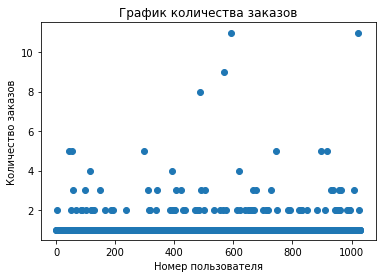

In [21]:
# для этого сначала сгруппируем таблицу по пользователям и количеству их заказов:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False)
                 .agg({'transactionId' : pd.Series.nunique}))
ordersByUsers.columns = ['userId','orders']

# построим график:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title("График количества заказов")
plt.xlabel("Номер пользователя")
plt.ylabel("Количество заказов")
plt.show()

Пользователей, сделавших более двух заказов не так много. Пользователей сделавших более двух заказов можно считать аномальными. Чтобы понять, 2 заказа это нормально или нет, посчитаем 95 и 00 перцентили количества заказов на пользователя.

In [22]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли более чем 2 заказа, и не более 1% пользователей оформляли 4 заказа. Выберем 2 заказа на одного пользователя за нижнюю границу числа заказов и отсеим аномальных пользователей по ней. 

Построим точечный график стоимостей заказов.

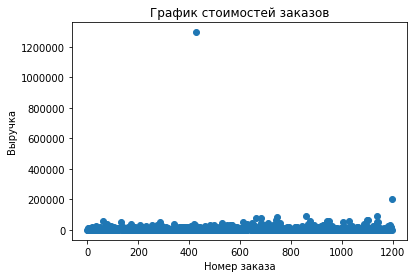

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title("График стоимостей заказов")
plt.xlabel("Номер заказа")
plt.ylabel("Выручка")
plt.show()

Суммы заказов в основном находятся в пределах до 100 000 у.е. Есть один заказ стоимостью около 200 000 у.е. и 1 заказ стоимостью выше 1 200 000 у.е. Эти два заказа явно аномальные для интернет-магазина. Чтобы понять, выше какой суммы стоимость заказа считается аномальной рассчитаем 95 и 99 перцентили стоимости заказов.

In [24]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов за период теста стоимостью 28 000 у.е. и не более 1% заказов - стоимостью 58 233,2 у.е. Выберем границу аномально дорогого заказа - 50 000 у.е.

Итак, за аномальных покупателей примем покупателей, которые совершили более двух заказов или совершили заказ на сумму более 50 000 у.е. Так мы уберём 5% покупателей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [25]:
# для этого создадим новую таблицу
# выделим количетсво посетителей магазина группы А по датам:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# посчитаем кумулятивное количество посетителей магазина группы А по датам:
visitorsACummulative = (visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                             .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1))
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# выделим количетсво посетителей магазина группы В по датам:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# посчитаем кумулятивное количество посетителей магазина группы А по датам:
visitorsBCummulative = (visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                             .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1))
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# отберем из таблицы orders заказы группы А и сгруппируем их так, чтобы за каждую дату были посчитаны количество заказов и сумма
# выручки: 
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# посчитаем куммулятивное количество заказов и сумму выручки за каждый день по группу А:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

# отберем из таблицы orders заказы группы В и сгруппируем их так, чтобы за каждую дату были посчитаны количество заказов и сумма
# выручки: 
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# посчитаем куммулятивное количество заказов и сумму выручки за каждый день по группу В:
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

# объединим полученные таблицы в одну:
data_by_dates = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data_by_dates.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [26]:
# затем создадим переменные ordersByUsersA и ordersByUsersB.
# в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

# объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
# тем, кто ничего не заказал, будут соответствовать нули
sampleA = (pd.concat([ordersByUsersA['orders'],pd.Series(0,
          index=np.arange(data_by_dates['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0))

sampleB = (pd.concat([ordersByUsersB['orders'],pd.Series(0,
          index=np.arange(data_by_dates['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0))

Проверим можно ли считать переменные sampleA и sampleB нормально распределенными. Для этого используем критерий Шапиро-Уилка:

H0 - распределение переменной sampleA нормальное;

Н1 - распределение переменной sampleA ненормальное.

In [27]:
alpha = .05

resultsA = st.shapiro(sampleA)
p_valueA = resultsA[1] 

print('p-значение A: ', p_valueA)

if (p_valueA < alpha):
    print("Отвергаем нулевую гипотезу: распределение  переменной sampleA не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, распределение  переменной sampleA нормально")

p-значение A:  0.0
Отвергаем нулевую гипотезу: распределение  переменной sampleA не нормально


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


H0 - распределение переменной sampleВ нормальное;

Н1 - распределение переменной sampleВ ненормальное.

In [28]:
resultsB = st.shapiro(sampleB)
p_valueB = resultsB[1] 

print('p-значение: ', p_valueB)

if (p_valueB < alpha):
    print("Отвергаем нулевую гипотезу: распределение  переменной sampleB не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, распределение  переменной sampleB нормально")
    

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение  переменной sampleB не нормально


Переменные sampleA и sampleB распределены ненормально, значит для оценки разницы конверсии между группами применим критерий Манна-Уитни: 

Н0 - нет статистически значимых различий в конверсии между группами теста;

Н1 - есть статистически значимые различия в конверсии между группами теста.

In [29]:
alpha = .05 

results = st.mannwhitneyu(sampleA, sampleB)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("Относительный прирост конверсии группы В составил {0:.2%}".format(sampleB.mean()/sampleA.mean()-1))

p-значение:  0.008396177528376304
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост конверсии группы В составил 13.81%


Первое число — p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост конверсии группы B равен 13,81%.

Рассчитаем статистическую значимость различий в среднем чеке между группами и найдём относительные различия в среднем чеке между группами.

Н0 - нет статистически значимых различий средних чеков групп теста;

Н1 - есть статистически значимые различия средних чеков групп теста.

In [30]:
alpha = .05 

results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("Относительный прирост среднего чека группы В составил {0:.2%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение:  0.3646454927716229
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный прирост среднего чека группы В составил 25.87%


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет, но средний чек группы B значительно выше среднего чека группы на 25,87%. Нужно проанализировать влияние аномальных покупателей. За аномальных покупателей мы приняли покупателей, которые совершили более двух заказов или совершили заказ на сумму более 50 000 у.е.

In [31]:
# cделаем срезы покупателей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 50 000
#у.е. — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
usersWithManyOrders = (pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
                                  ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0))
                       
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

# узнаем, сколько всего аномальных пользователей методом shape().
abnormalUsers.shape

(37,)

Всего 37 аномальных пользователей.

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.

In [32]:
# cначала подготовим выборки количества заказов по пользователям по группам теста:
sampleAFiltered = (pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data_by_dates['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                             name='orders')],axis=0))

sampleBFiltered = (pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data_by_dates['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                             name='orders')],axis=0))

Н0 - нет статистически значимых различий в конверсии между группами теста по очищенными данным;

Н1 - есть статистически значимые различия в конверсии между группами теста по очещенным данным.

In [33]:
# применим статистический критерий Манна-Уитни к полученным выборкам:
alpha = .05 

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("Относительный прирост конверсии группы В составил {0:.2%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение:  0.004102983613996086
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост конверсии группы В составил 18.21%


Результаты по конверсии практически не изменились.  Относительный прирост конверсии группы В увеличился до 18.21%. Конверсия группы В лучше группы А. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Посчитаем статистическую значимость различий средних чеков групп теста по очищенным данным.

Н0 - нет статистически значимых различий средних чеков групп теста по очищенным данным;

Н1 - есть статистически значимые различия средних чеков групп теста по очищенным данным.

In [34]:
alpha = .05 

results = st.mannwhitneyu( orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("Относительный прирост среднего чека группы В составил {0:.2%}".format(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))


p-значение:  0.4700078994215456
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный прирост среднего чека группы В составил 1.91%


После очистки данных P-value только увеличился, то есть сделать вывод о том, что средний чек изменился - нельзя. Относительный прирост среднего чека группы В составил 1,91%.

## <font color=olive>4 шаг. Вывод</font>

График различия конверсии между группами сообщает, что результаты группы B лучше группы A: конверсия группы В примерно на 15% выше конверсии группы А. Проверка этой гипотезы показала, что есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.

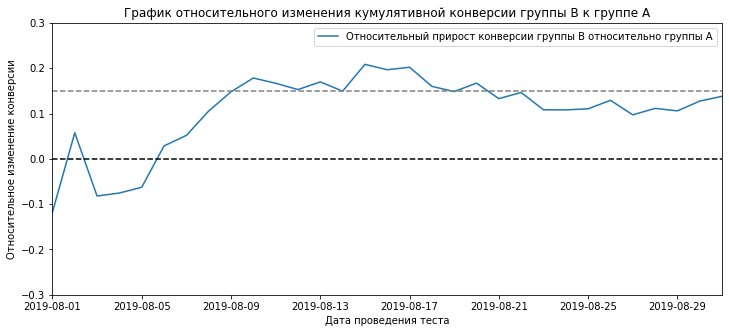

In [35]:
plt.figure(figsize=(12, 5))
plt.title("График относительного изменения кумулятивной конверсии группы В к группе А")
plt.xlabel("Дата проведения теста")
plt.ylabel("Относительное изменение конверсии")
(plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']
         /mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A"))
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.3, 0.3])
plt.show()

График различия среднего чека колеблется: он позволил найти аномалии, но сделать из этого графика определённые выводы нельзя. А при проверке гипотезы о различии среднего чека между группами теста по сырым данным, несмотря на относительный прирост среднего чека в 26%, нет статистически значимого различия по среднему чеку между группами. По очищенным данным ситуация аналогичная, но прирост среднего чека составил всего 2%.

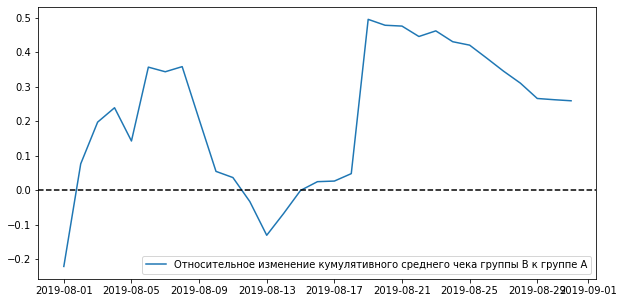

In [36]:
plt.figure(figsize=(10, 5))
(plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
          (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,
          label="Относительное изменение кумулятивного среднего чека группы B к группе A"))
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Исходя из имеющихся фактов, тест следует остановить и признать его успешным.